<a href="https://colab.research.google.com/github/russodanielp/intro_cheminformatics/blob/google_colab/Lab%2009%20-%20Data%20Science%20in%20Chemistry/colab_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science in Chemistry

## Aim of this lab

To use and understand the role of data science and database in chemistry. 

### Objectives

* To understand the concepts of a REST-Ful Automated Programming Interface.  
* Learn how to use PubChem's API
* Learn how to use ChEMBl's API


## Background


PubChem is the largest chemical data resource.  Data in PubChem is stored in three databases PubChem Susbtance, PubChem Compound, and PubChem Bioassay.  Programmatic access is available via a Pug RESTful interface.  


### Restful APIs

Most chemical and biological databases have graphical user interfaces via a web portal.  For example, we can go directly to the PubChem web page for [aspirin](https://pubchem.ncbi.nlm.nih.gov/compound/Aspirin) and view all the chemical and biological PubChem has to offer, chemical identifiers, properties and assay testing results.  

However, in cheminformatics, you are often dealing with hundreds to thousands of chemicals, making manual retrieval for these properties.  Because of that, most scientific web sites that offer data acess allowed for programmatic retrieval.  This usually comes in the form of a [RESTFul](https://en.wikipedia.org/wiki/Representational_state_transfer) automated programming interface (API).  

RESTFul-style APIs allow access to databases via data via the construction of a Uniform Resource Locator (URL), a.k.a. a web address.  URLs can be read and integrated into any programming language, including Python, in order to automate the of specific data.  An example of some common API queries using PubChem's API is shown below in __Figure 1__.  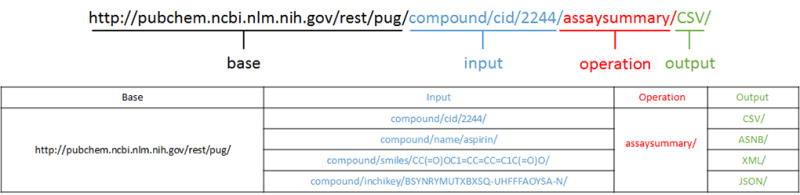

In this notebook, we will explore the APIs of the two most popuplar chemical databases in cheminformatics, [PubChem](https://pubchem.ncbi.nlm.nih.gov/) and [ChEMBl](https://www.ebi.ac.uk/chembl/).  In the PubChem databases, we will explore and retrieve some chemical information from our dataset.  Then, we will retrieve find a bioassay from chembl of interest to download for our QSAR modeling.  

### PubChem

[PubChem](https://pubchem.ncbi.nlm.nih.gov/) is an open database containing chemical molecules and their measured activities against biological assays, maintained by the [National Center for Biotechnology Information (NCBI)](https://www.ncbi.nlm.nih.gov/), part of [National Institutes of Health (NIH)](https://www.nih.gov/). It is the world’s largest freely available database of chemical information, collected from more than 770 data sources. There are three dynamically growing primary subdatabases, i.e., substances, compounds, and bioassay databases. 
As of August 2020, PubChem contains over 110 million unique chemical structures and over 270 million bioactivities ([_Nucleic Acids Res._(2021), __49__, D1388–D1395](https://academic.oup.com/nar/article/49/D1/D1388/5957164)). 

These compounds can be queried using a broad range of properties including chemical structure, name, fragments, chemical formula, molecular weight, XlogP, hydrogen bond donor and acceptor count, etc. There is no doubt that PubChem has become a key chemical information resource for scientists, students, and the general public.

Every data from PubChem is free to access through both the web interface and a programmatic interface. Here, we are going to learn how to use the API of PubChem to do some cool things.

### Programmatic access to PubChem

For some reasons, mainly historical, PubChem provides several ways of programmatic access to the open data.

* [PUG-REST](https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest) is a Representational State Transfer (REST)-style version of the PUG (Power User Gateway) web service, with both the syntax of the HTTP requests and the available functions. It can also provide convenient access to information on PubChem records which are not reachable with other PUG services. 

* PUG-View is another REST-style web service for PubChem. It can provide full reports, including third-party textual annotation, for PubChem records.

*  PUG offers programmatic access to PubChem service via a single common gateway interface (CGI).

* PUG-SOAP uses the simple object access protocol (SOAP) to access PubChem data.

* PubChemRDF REST interface is a special interface for RDF-encoded PubChem data.

For more details about the PubChem API, please check out the introduction of [programmatic access](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access) in the PubChem Docs.

In this tutorial, we will focus on the **PUG-REST** variant of the API. 

## PubChem API

Before querying PubChem for similar compounds, we provide some simple examples to show how to use the PubChem API. For more detail about the PubChem API, see [PUG-REST tutorial](https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest-tutorial).

In this section, we will discuss how to search PubChem based on a given query molecule using the PUG-REST access. As stated before, Python has some libraries that help with performing HTTP requests and allows prorammatic access.  

The fundamental part of access a REST-ful API is creating the url.  We start with the base, choose an identifer we want to query, combine the query identifier, the operation we want to perform, followed by how we want the data.

Let's start by looking up the PubChem CID for asprin.

In [7]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 45.0 MB/s eta 0:00:00


In [1]:
name = 'aspirin'

url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/cids/JSON"
print(url)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/cids/JSON


Clicking on the above link and you'll see we can successful get the data we wanted.  We could ask for the same information in txt form.  

In [2]:
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/cids/txt"
print(url)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/cids/txt


We can see that the PubChem CID for aspirin is 2244.  But often we want to do this programatically.  Which using Python we can read this information into a Python variable.  

In [3]:
from urllib.parse import quote
import requests
import pandas as pd

name = "aspirin"

url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/cids/JSON"

r = requests.get(url)
r.raise_for_status()
response = r.json()

print(response)

cid = response["IdentifierList"]["CID"][0]

print(f"PubChem CID for {name} is:\n{cid}")

{'IdentifierList': {'CID': [2244]}}
PubChem CID for aspirin is:
2244


#### Retrieve molecular properties based on a PubChem CID
We can get interesting properties for a compound through its PubChem CID, such as molecular weight, pKd, logP, etc. Here, we will search for the molecular weight for Aspirin.

In [4]:
# Get mol weight for aspirin
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularWeight/JSON"

r = requests.get(url)
r.raise_for_status()
response = r.json()

print(response)

mol_weight = response["PropertyTable"]["Properties"][0]["MolecularWeight"]

print(f"Molecular weight for {name} is:\n{mol_weight}")

{'PropertyTable': {'Properties': [{'CID': 2244, 'MolecularWeight': '180.16'}]}}
Molecular weight for aspirin is:
180.16


#### Depict a compound with PubChem

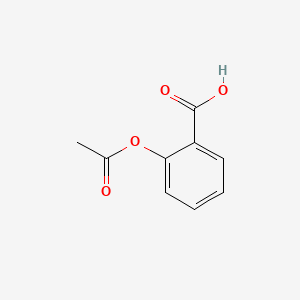

In [5]:
from IPython.display import Image
# Get PNG image from PubChem
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/PNG"

r = requests.get(url)
r.raise_for_status()


display(Image(r.content))

More often, it's necessary to get properties for sets of chemicals.  For this we could make repeated calls using a `for` loop.

__NOTE__: It's good practice not to overwhlem the server with repeated calls when doing something multiple times.  This could lead your IP address to being banned.  It's usually ideal to put some pause between calls for this.  

For example, we can use the smiles from our benzodiazipine dataset to get the cids for each chemical.  For brevity, we'll limit this to just the first ten molecules. 

In [9]:
import time
from rdkit import Chem

mols = Chem.SDMolSupplier('DIAZEPAM_w_name.sdf')

for i, mol in enumerate(mols):
    smiles = Chem.MolToSmiles(mol)
    name = mol.GetProp('Name')
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{smiles}/cids/json"

    r = requests.get(url)
    r.raise_for_status()
    response = r.json()

    cid = response["IdentifierList"]["CID"][0]
    print(f"PubChem CID for {name} with SMILES {smiles} is:\n{cid}")
    if i > 9:
        break
    else:
        time.sleep(1)
    

PubChem CID for Mol_0 with SMILES CN1Cc2c(C(=O)OC(C)(C)C)ncn2-c2ccccc2C1=O is:
398203
PubChem CID for Mol_1 with SMILES COC(=O)c1ncn2c1CN(C)C(=O)c1cc(Cl)ccc1-2 is:
10402859
PubChem CID for Mol_2 with SMILES CCCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(Cl)ccc1-2 is:
9974092
PubChem CID for Mol_3 with SMILES CC(C)OC(=O)c1ncn2c1CN(C)C(=O)c1cc(Cl)ccc1-2 is:
9974093
PubChem CID for Mol_4 with SMILES CN1Cc2c(C(=O)OCC3CC3)ncn2-c2ccc(Cl)cc2C1=O is:
10337642
PubChem CID for Mol_5 with SMILES CN1Cc2c(C(=O)OC(C)(C)C)ncn2-c2ccc(Cl)cc2C1=O is:
192352
PubChem CID for Mol_6 with SMILES CCC(CC)OC(=O)c1ncn2c1CN(C)C(=O)c1cc(Cl)ccc1-2 is:
10338649
PubChem CID for Mol_7 with SMILES CN1Cc2c(C(=O)OCC(C)(C)C)ncn2-c2ccc(Cl)cc2C1=O is:
9998704
PubChem CID for Mol_8 with SMILES C=CCN1Cc2c(C(=O)OCC)ncn2-c2ccccc2C1=O is:
10244940
PubChem CID for Mol_9 with SMILES CCOC(=O)c1ncn2c1CN(Cc1ccccc1)C(=O)c1cc(Cl)ccc1-2 is:
10092111
PubChem CID for Mol_10 with SMILES CCOC(=O)c1ncn2c1CN(Cc1ccccc1)C(=O)c1c(Cl)cccc1-2 is:
10023623


Another common task is to obtain all the biological assays for a tested compound.  For that there is a [book chapter](https://link.springer.com/protocol/10.1007/978-1-0716-2213-1_12) that outlines how to do this in PubChem.  The script used in the book chapter to retrieve large sets of bioassays for large sets of chemicals can be found [here](https://github.com/zhu-research-group/HTSProfiling).

### ChEMBL database
>"ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs." ([ChEMBL website](https://www.ebi.ac.uk/chembl/))

* Open large-scale bioactivity database
* **Current data content (as of 09.2020, ChEMBL 27):**
    * \>1.9 million distinct compounds
    * \>16 million activity values
    * Assays are mapped to ~13,000 targets
* **Data sources** include scientific literature, PubChem bioassays, Drugs for Neglected Diseases Initiative (DNDi), BindingDB database, ...
* ChEMBL data can be accessed via a [web-interface](https://www.ebi.ac.uk/chembl/), the [EBI-RDF platform](https://www.ncbi.nlm.nih.gov/pubmed/24413672) and the [ChEMBL webrescource client](https://github.com/chembl/chembl_webresource_client)

Unlike PubChem, there is a Python library developed by ChEMBL called the ChEMBL webresource client which allows for easier querying.  

### Compound activity measures

#### IC50 measure

* [Half maximal inhibitory concentration](https://en.wikipedia.org/wiki/IC50)
* Indicates how much of a particular drug or other substance is needed to inhibit a given biological process by half

#### pIC50 value

* To facilitate the comparison of IC50 values, which have a large value range and are given in different units (M, nM, ...), often pIC50 values are used
* The pIC50 is the negative log of the IC50 value when converted to molar units: 
    $ pIC_{50} = -log_{10}(IC_{50}) $, where $ IC_{50}$ is specified in units of M
* Higher pIC50 values indicate exponentially greater potency of the drug
* Note that the conversion can be adapted to the respective IC50 unit, e.g. for nM: $pIC_{50} = -log_{10}(IC_{50}*10^{-9})= 9-log_{10}(IC_{50}) $

Other activity measures:

Besides, IC50 and pIC50, other bioactivity measures are used, such as the equilibrium constant [KI](https://en.wikipedia.org/wiki/Equilibrium_constant) and the half maximal effective concentration  [EC50](https://en.wikipedia.org/wiki/EC50).

In [2]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from chembl_webresource_client.new_client import new_client

In this example, we will work with ChEMBL assay 1909108.  [This assay](https://www.ebi.ac.uk/chembl/assay_report_card/CHEMBL1909108/) is a binding assay for the serotonin type-6 receptor, 5HT6.  It contains both IC50 values as well as Ki values.

In [4]:
chembl_id = "CHEMBL1909108"

overview = new_client.assay.get(chembl_id)

# print assay overview
overview

{'assay_category': None,
 'assay_cell_type': 'HeLa',
 'assay_chembl_id': 'CHEMBL1909108',
 'assay_classifications': [],
 'assay_organism': None,
 'assay_parameters': [],
 'assay_strain': None,
 'assay_subcellular_fraction': 'Membrane',
 'assay_tax_id': 32644,
 'assay_test_type': 'In vitro',
 'assay_tissue': None,
 'assay_type': 'B',
 'assay_type_description': 'Binding',
 'bao_format': 'BAO_0000249',
 'bao_label': 'cell membrane format',
 'cell_chembl_id': 'CHEMBL3308376',
 'confidence_description': 'Homologous single protein target assigned',
 'confidence_score': 8,
 'description': 'DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-HT6 radioligand binding (ligand: [3H] Lysergic acid diethylamide)',
 'document_chembl_id': 'CHEMBL1909046',
 'relationship_description': 'Homologous protein target assigned',
 'relationship_type': 'H',
 'src_assay_id': '120',
 'src_id': 15,
 'target_chembl_id': 'CHEMBL3371',
 'tissue_chembl_id': None,
 'variant_sequence': None}

Every assay "record" is a molecule with an experimental outcome (i.e., IC50 of Ki value).  So, well need to reformat the data.

In [5]:
records = new_client.activity.filter(assay_chembl_id=chembl_id)

print(len(records))
records[0]

1742


{'activity_comment': 'Not Active (inhibition < 50% @ 10 uM and thus dose-reponse curve not measured)',
 'activity_id': 7599020,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL1909108',
 'assay_description': 'DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-HT6 radioligand binding (ligand: [3H] Lysergic acid diethylamide)',
 'assay_type': 'B',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000249',
 'bao_label': 'cell membrane format',
 'canonical_smiles': 'CC(=O)OC[C@H]1O[C@@H](n2ncc(=O)[nH]c2=O)[C@H](OC(C)=O)[C@@H]1OC(C)=O',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1909046',
 'document_journal': None,
 'document_year': None,
 'ligand_efficiency': None,
 'molecule_chembl_id': 'CHEMBL515914',
 'molecule_pref_name': 'AZARIBINE',
 'parent_molecule_chembl_id': 'CHEMBL515914',
 'pchembl_value': None,
 'potential_duplicate': 0,
 'qudt_units': None,
 'record_i

In [11]:
import pandas as pd
data = pd.DataFrame(records)

In [19]:
data.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Not Active (inhibition < 50% @ 10 uM and thus ...,7599020,[],CHEMBL1909108,DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-...,B,None,None,BAO_0000190,BAO_0000249,...,Homo sapiens,Serotonin 6 (5-HT6) receptor,9606,None,None,IC50,None,None,None,None
1,Not Active (inhibition < 50% @ 10 uM and thus ...,7599021,[],CHEMBL1909108,DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-...,B,None,None,BAO_0000192,BAO_0000249,...,Homo sapiens,Serotonin 6 (5-HT6) receptor,9606,None,None,Ki,None,None,None,None
2,Not Active (inhibition < 50% @ 10 uM and thus ...,7599166,[],CHEMBL1909108,DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-...,B,None,None,BAO_0000190,BAO_0000249,...,Homo sapiens,Serotonin 6 (5-HT6) receptor,9606,None,None,IC50,None,None,None,None
3,Not Active (inhibition < 50% @ 10 uM and thus ...,7599167,[],CHEMBL1909108,DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-...,B,None,None,BAO_0000192,BAO_0000249,...,Homo sapiens,Serotonin 6 (5-HT6) receptor,9606,None,None,Ki,None,None,None,None
4,Not Active (inhibition < 50% @ 10 uM and thus ...,7599303,[],CHEMBL1909108,DRUGMATRIX: Serotonin (5-Hydroxytryptamine) 5-...,B,None,None,BAO_0000190,BAO_0000249,...,Homo sapiens,Serotonin 6 (5-HT6) receptor,9606,None,None,IC50,None,None,None,None


#### Write output data to file

We want to use this bioactivity-compound dataset later, thus we save the data as `csv` file. 

In [12]:
data.to_csv("5ht6_compounds.csv")

## Accessing Other ChEMBL databases

You can also query by target.  We could look up the uniprot ID for serotoin type 6 receptor then get all bioactivity information associated with that target.   

In [13]:
uniprot_id = "P50406"


targets = new_client.target.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)

In [14]:
target_list = pd.DataFrame(targets)
target_list.head()

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Serotonin 6 (5-HT6) receptor,CHEMBL3371,SINGLE PROTEIN
1,Homo sapiens,Serotonin (5-HT) receptor,CHEMBL2096904,PROTEIN FAMILY


In [15]:
bioactivities = new_client.activity.filter(target_chembl_id="CHEMBL3377", type="IC50", relation="=", assay_type="B").only(
                                                                                                                        "activity_id",
                                                                                                                        "assay_chembl_id",
                                                                                                                        "assay_description",
                                                                                                                        "assay_type",
                                                                                                                        "molecule_chembl_id",
                                                                                                                        "type",
                                                                                                                        "standard_units",
                                                                                                                        "relation",
                                                                                                                        "standard_value",
                                                                                                                        "target_chembl_id",
                                                                                                                        "target_organism",
                                                                                                                        "canonical_smiles"
                                                                                                                    )


In [16]:
bioactivities = pd.DataFrame(bioactivities)
bioactivities.head()

,activity_id,assay_chembl_id,assay_description,assay_type,canonical_smiles,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,113313,CHEMBL747370,inhibitory concentration required to inhibit n...,B,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,CHEMBL139367,=,nM,11.0,CHEMBL3377,Influenza B virus (strain B/Lee/1940),IC50,nM,11.0
1,114255,CHEMBL808315,Inhibitory activity against influenza B virus ...,B,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,CHEMBL222813,=,nM,20.0,CHEMBL3377,Influenza B virus (strain B/Lee/1940),IC50,uM,0.02
2,118014,CHEMBL808315,Inhibitory activity against influenza B virus ...,B,CC(=O)N[C@@H]1[C@@H](NC(=O)OC(C)(C)C)C=C(C(=O)...,CHEMBL305240,=,nM,130000.0,CHEMBL3377,Influenza B virus (strain B/Lee/1940),IC50,uM,130.0
3,119241,CHEMBL808315,Inhibitory activity against influenza B virus ...,B,CC(=O)N[C@@H]1[C@@H](N)C=C(C(=O)O)O[C@H]1c1nc(...,CHEMBL303175,=,nM,43000.0,CHEMBL3377,Influenza B virus (strain B/Lee/1940),IC50,uM,43.0
4,120899,CHEMBL747370,inhibitory concentration required to inhibit n...,B,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@H]1NC(C)=O,CHEMBL674,=,nM,24.3,CHEMBL3377,Influenza B virus (strain B/Lee/1940),IC50,nM,24.3


In [17]:
bioactivities.shape

(262, 14)

In [18]:

bioactivities.to_csv("5ht6_all_assay_activity.csv")